In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

from numpy import cos, sin
import math

import subprocess
import os
import time

In [81]:
outDir = "frames"
FFMPEG = 'ffmpeg'
numFrames = 360
CMD = [FFMPEG, '-y', '-r', '30', '-f', 'image2', '-i', f'{outDir}/frame_%03d.png',
       '-vcodec', 'libx264', '-crf', '25', '-pix_fmt', 'yuv420p', 'bezier.mp4']
print(' '.join(CMD))

def animate():
    subprocess.run(CMD)



ffmpeg -y -r 30 -f image2 -i frames/frame_%03d.png -vcodec libx264 -crf 25 -pix_fmt yuv420p bezier.mp4


In [3]:
def bernsteinPolynom(nu,n,x):
    coeff = math.comb(n, nu)
    return coeff * (x ** nu)*(1 - x)**(n-nu)

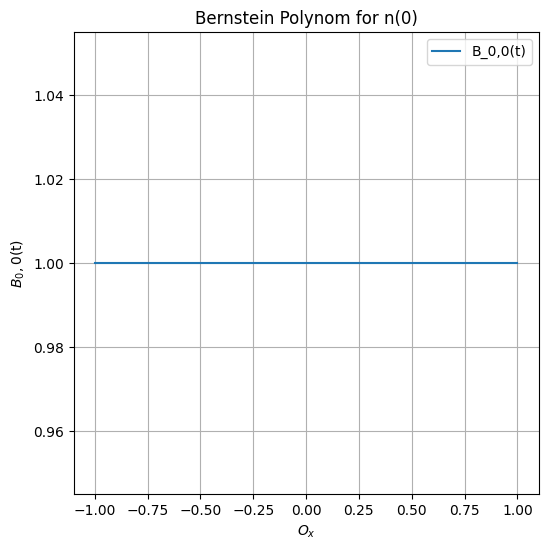

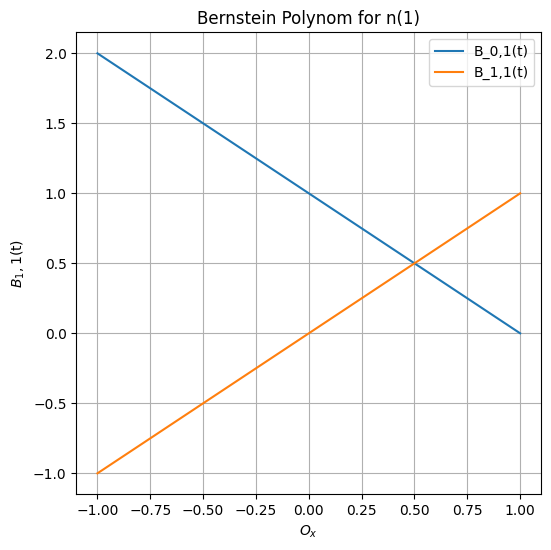

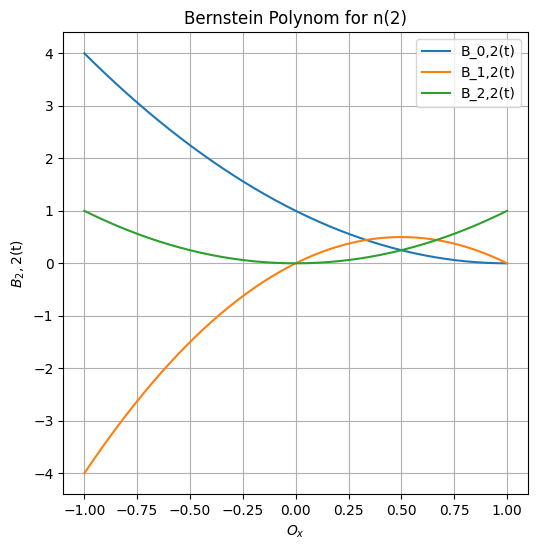

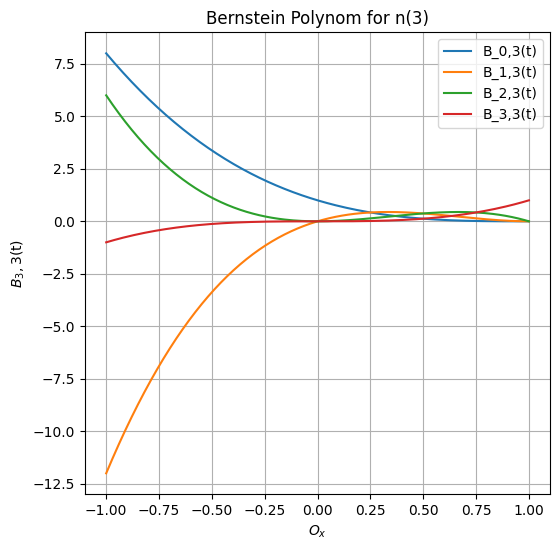

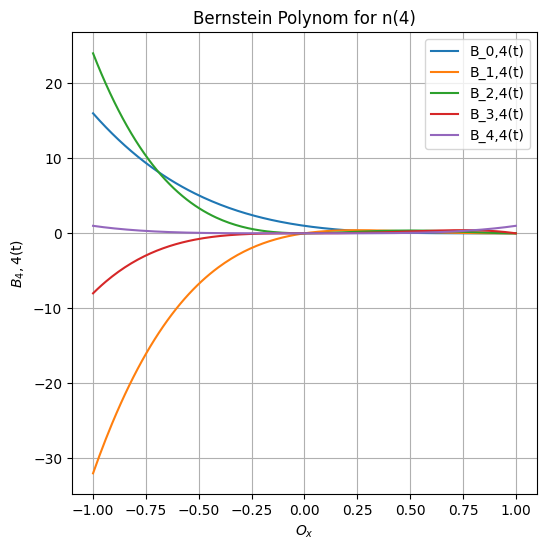

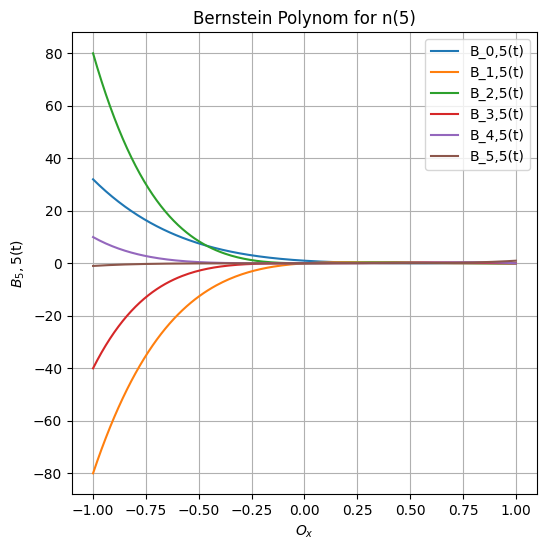

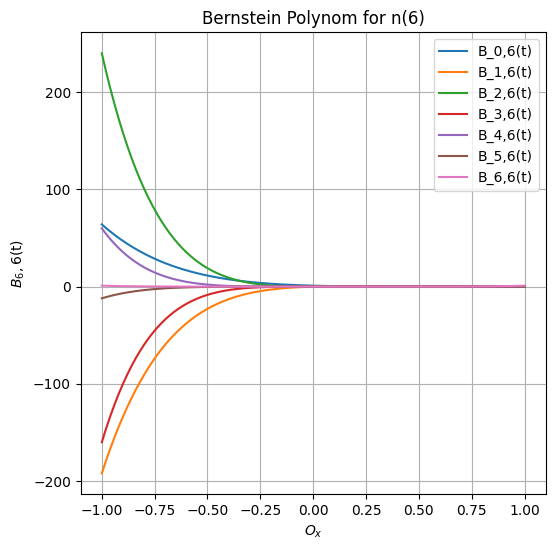

In [4]:
x = np.linspace(-1,1,200)
n = 6
# n = 6 -> size(B) = 7
for nu in range(n+1):
    plt.figure(figsize=(6,6))
    for i in range(nu+1):
        plt.plot(x, bernsteinPolynom(i, nu, x), label=f'B_{i},{nu}(t)')
    plt.title(f'Bernstein Polynom for n({nu})')
    plt.xlabel(f'$O_x$')
    plt.ylabel(f'$B_{i},{nu}$(t)')
    plt.legend()
    plt.grid()
    plt.show()

[[1.65098478 1.43286084]
 [2.3786855  1.62947721]
 [3.01646091 1.61728395]
 [3.42002405 1.44200579]
 [3.4877644  1.16765737]
 [3.18106996 0.87654321]
 [2.54464936 0.66925774]
 [1.72685397 0.66468526]]


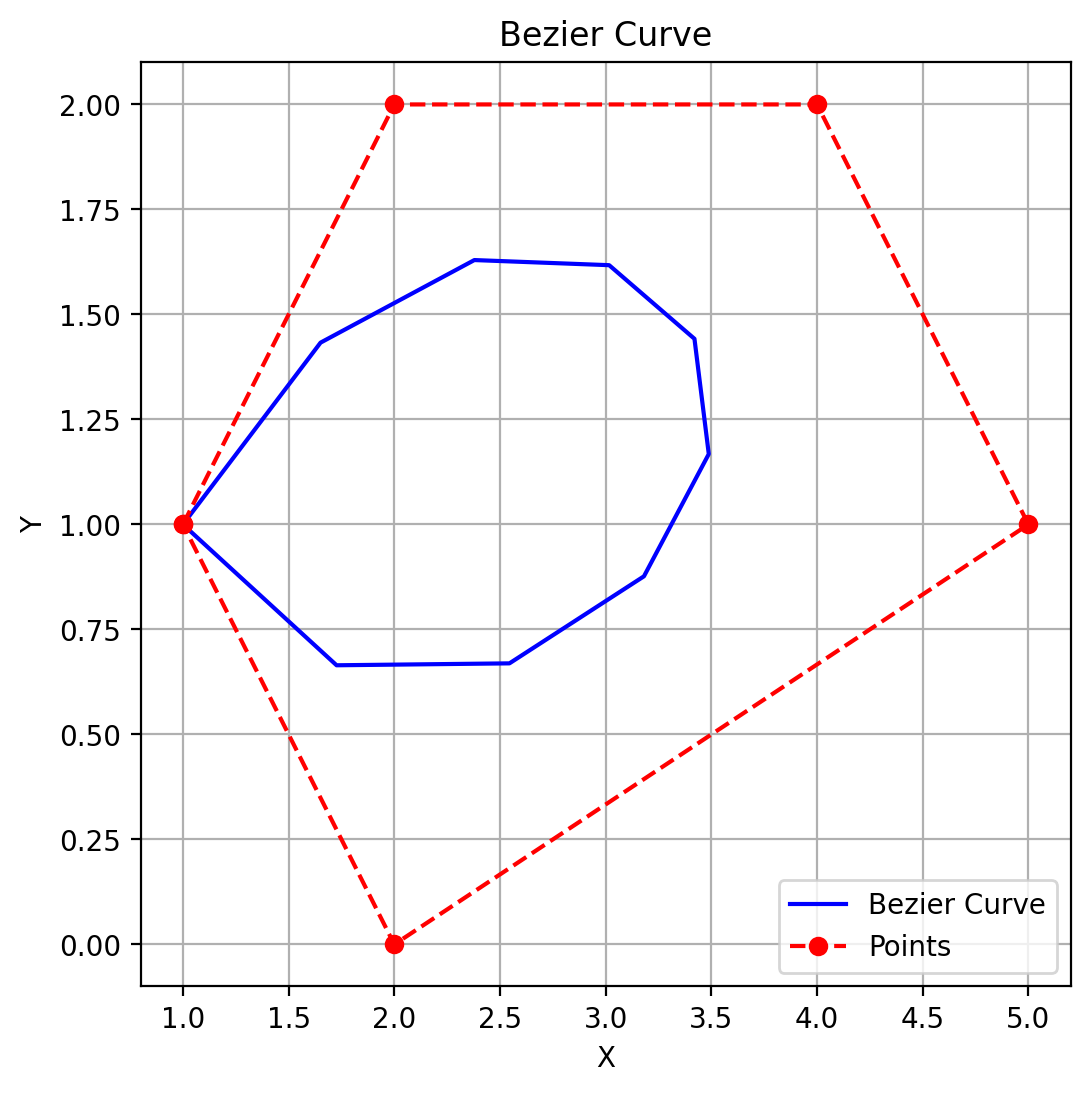

In [46]:
def bezierCurve(points, numPoints):
    n = len(points) - 1
    x = np.linspace(0, 1, numPoints)
    curvePoints= np.zeros((numPoints,2))

    for i in range(n+1):
        b_i_n = bernsteinPolynom(i, n, x)
        curvePoints += points[i] * b_i_n[:, np.newaxis] 

    return curvePoints

points = np.array([
    (1, 1),
    (2, 2),
    (4, 2),
    (5, 1),
    (2, 0),
    (1, 1)
], dtype=float)

curvePoints = bezierCurve(points, 10)
print(curvePoints[1:len(curvePoints)-1]) # Approximately the same ones +- 0.15
plt.figure(figsize=(6, 6), dpi=200)
plt.plot(curvePoints[:, 0], curvePoints[:, 1], label='Bezier Curve', color='blue')
plt.plot(points[:, 0], points[:, 1], 'ro--', label='Points')
plt.title('Bezier Curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

For n = 2:
Time for Bezier's curve function: 0.000201 seconds
Time for Bezier's matrix version: 0.000473 seconds



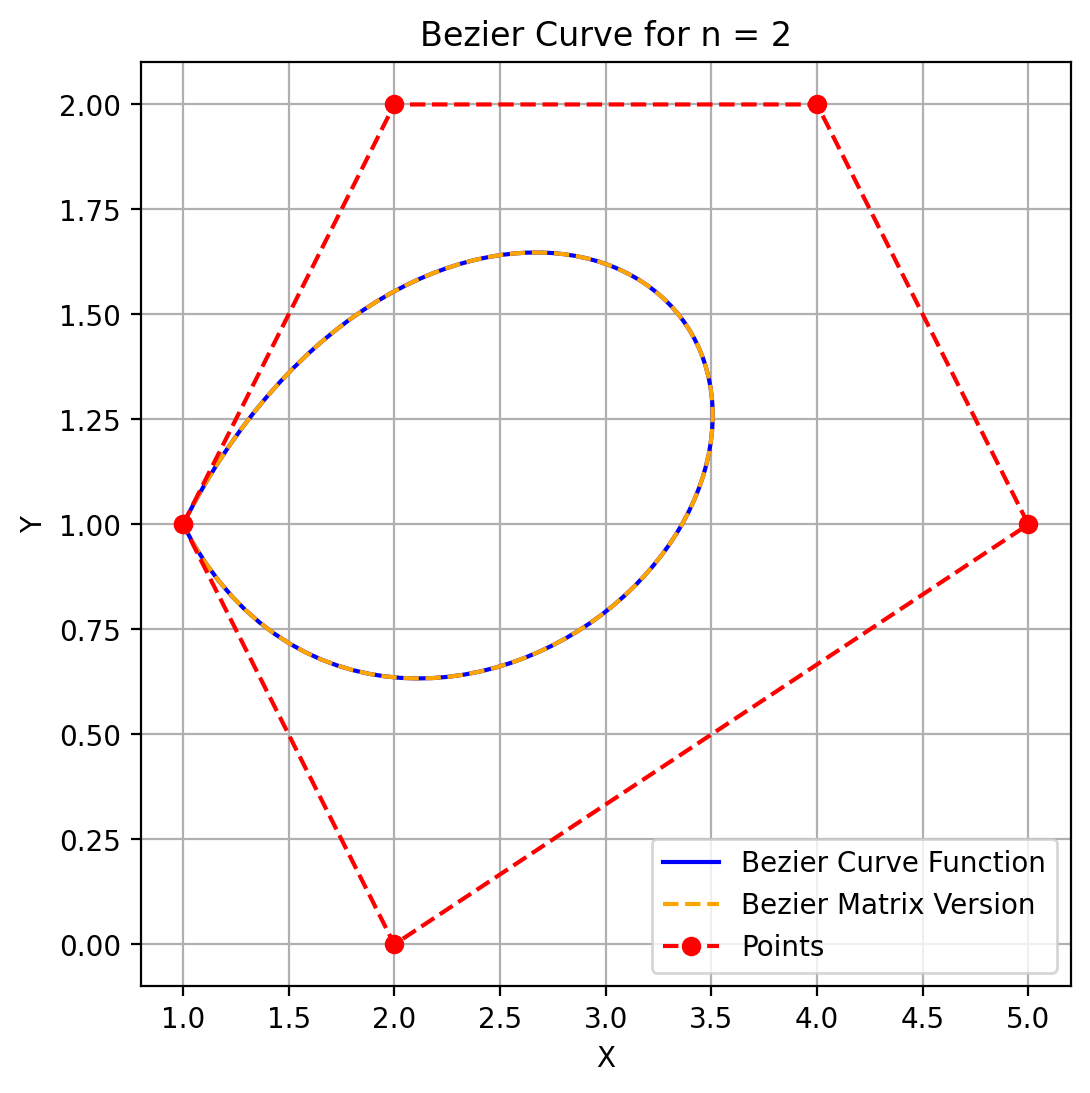

For n = 3:
Time for Bezier's curve function: 0.000184 seconds
Time for Bezier's matrix version: 0.000232 seconds



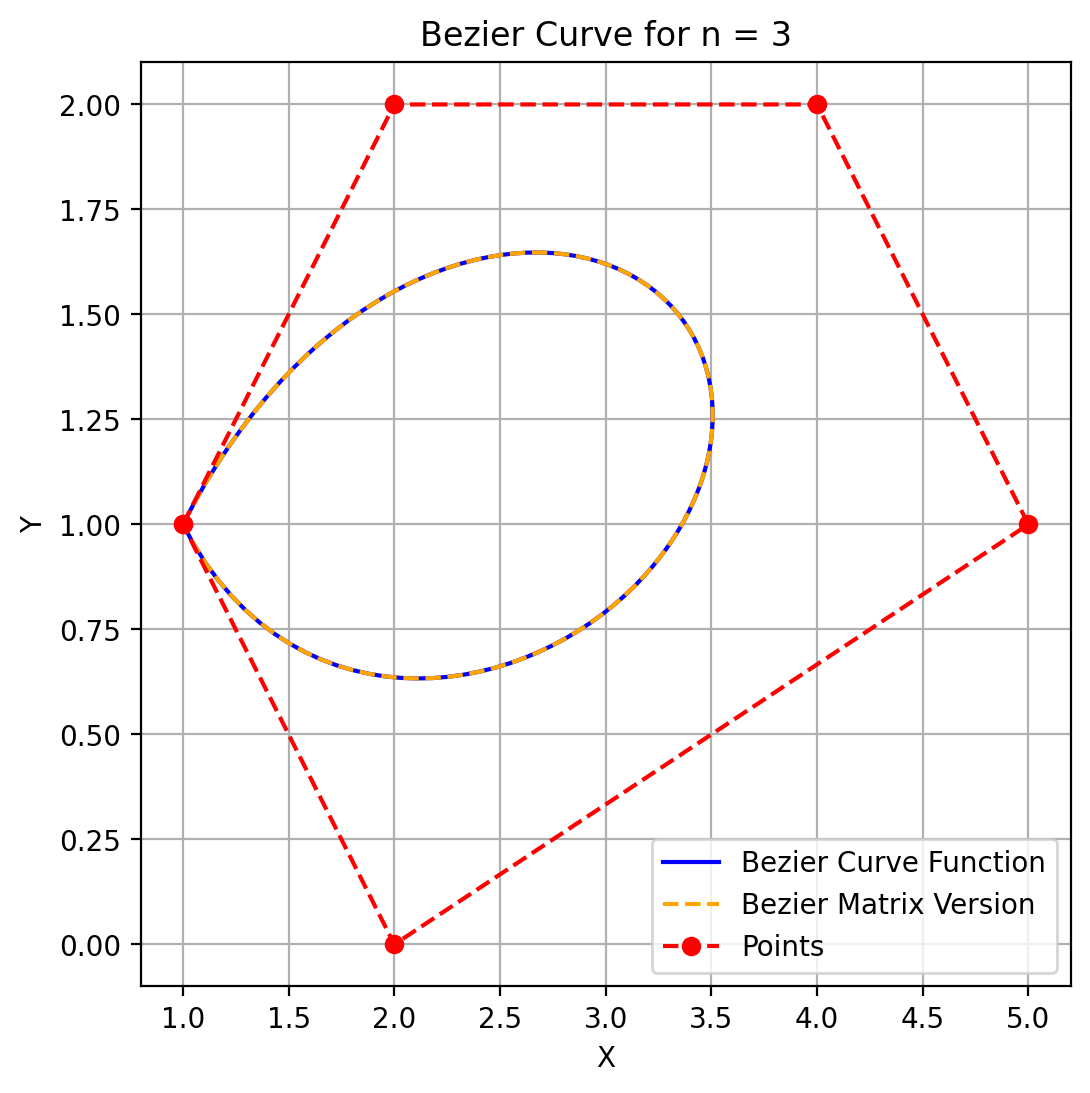

For n = 4:
Time for Bezier's curve function: 0.000169 seconds
Time for Bezier's matrix version: 0.000155 seconds



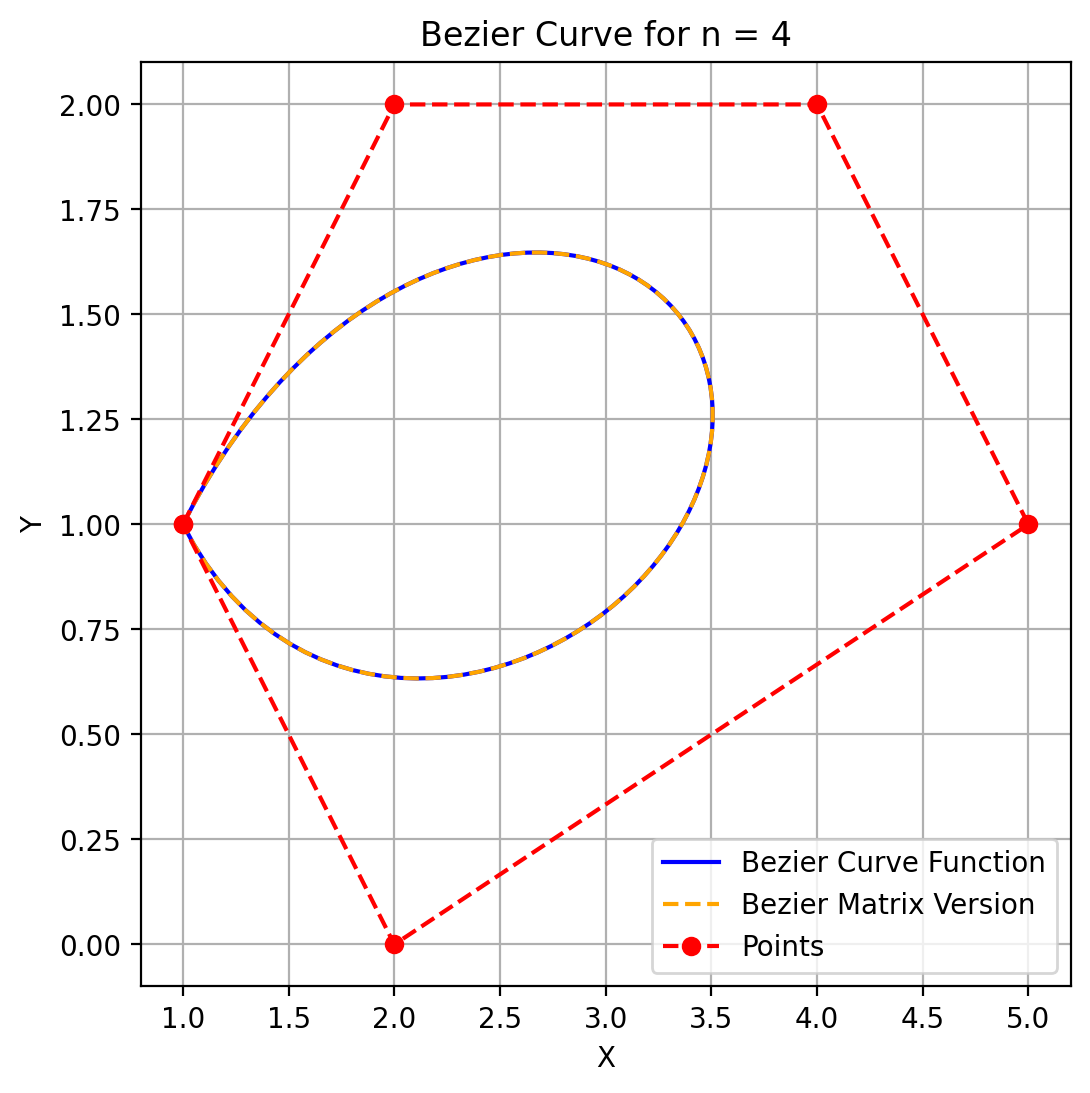

For n = 5:
Time for Bezier's curve function: 0.000163 seconds
Time for Bezier's matrix version: 0.000187 seconds



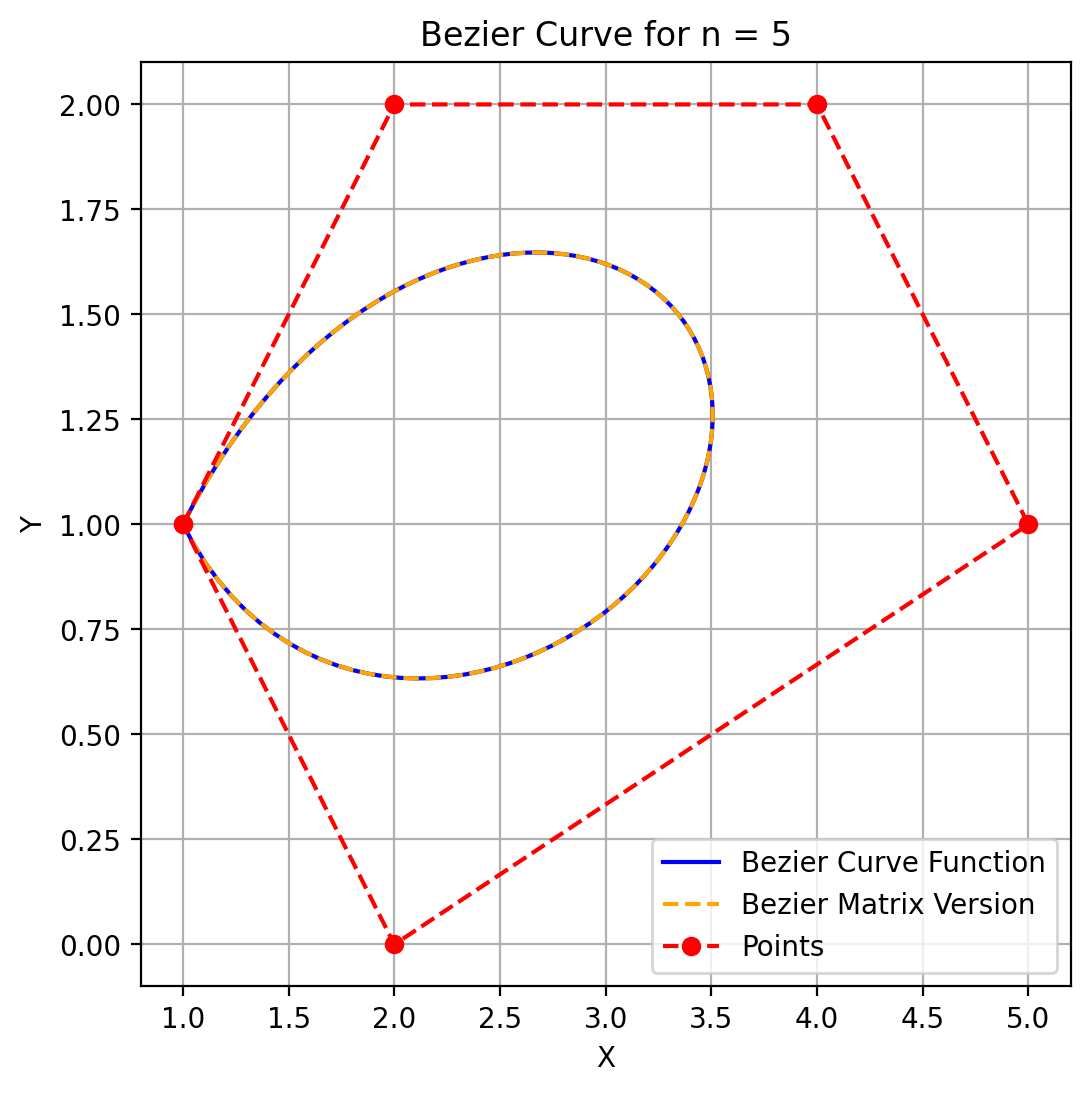

In [8]:
def bezierCurveMatrix(points, nums):
    n = len(points) - 1
    x = np.linspace(0,1,nums)
    B_n = np.zeros((nums,n+1))
    for i in range(n+1):
        B_n[:,i] = bernsteinPolynom(i,n,x)

    return np.dot(B_n, points)
    
for n in range(2,6):
    selected = points[:n+1]

    start = time.time()
    curveBezier = bezierCurve(points,100)
    timeBezierCurve = time.time() - start

    start = time.time()
    curveMatrix = bezierCurveMatrix(points, 100)
    timeMatrix = time.time() - start

    print(f'For n = {n}:')
    print(f'Time for Bezier\'s curve function: {timeBezierCurve:.6f} seconds')
    print(f'Time for Bezier\'s matrix version: {timeMatrix:.6f} seconds\n')

    plt.figure(figsize=(6, 6), dpi=200)
    plt.plot(curveBezier[:, 0], curveBezier[:, 1], label='Bezier Curve Function', color='blue')
    plt.plot(curveMatrix[:, 0], curveMatrix[:, 1], label='Bezier Matrix Version', linestyle='--', color='orange')
    plt.plot(points[:, 0], points[:, 1], 'ro--', label='Points')
    plt.title(f'Bezier Curve for n = {n}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid()
    plt.show()

In [83]:
def deCasteljau(points, x):
    beta = np.copy(points)
    n = len(beta)

    for j in range(1,n):
        for k in range(n-j):
            beta[k] = (1-x) * beta[k] + x * beta[k+1]
    return beta[0]

def bezierCurveDeCasteljau(points, x, steps=100):
    
    curvePoints = []
    
    for i in range(steps):
        t = i / (steps-1)
        point = deCasteljau(points, t)
        curvePoints.append(point)
        
    return np.array(curvePoints)

def intermediatePoints(points, t):
    
    intermediate_points = []
    temp_points = np.copy(points)
    while len(temp_points) > 1:
        new_points = [(1-t)*temp_points[i] + t * temp_points[i+1] for i in range(len(temp_points) - 1)]
        intermediate_points.append(new_points)
        temp_points = np.array(new_points)
    
    return intermediate_points


frames = 60
curves = 6

def main():
    curr_points = points
    curr_points.astype(np.float64)
    
    for frame in range(frames):
        x = frame / frames
        fig, ax = plt.subplots(figsize=(6, 6), dpi=200)
        ax.set_xlim(0, 5.2)
        ax.set_ylim(-0.3, 2.2)
        ax.set_title(f'De Casteljau Algorithm Animation (x={x:.2f})')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.grid()
        
        curve_points =  bezierCurveDeCasteljau(curr_points, x)
        
        ax.plot(curr_points[:, 0], curr_points[:, 1], 'ro--', label='Points')
        ax.plot(curve_points[:, 0], curve_points[:, 1], 'b--', label='Bézier Curve' )
        
        
        
        for t in np.linspace(0,x,curves):
            intermediate_points = intermediatePoints(points, t)

            for points_set in intermediate_points:
                points_set = np.array(points_set)
                ax.plot(points_set[:, 0], points_set[:, 1], 'g--', linewidth=1)
                ax.plot(points_set[:, 0], points_set[:, 1], 'go')
        plt.savefig(f'frames/frame_{frame:03d}.png')
        plt.legend()
        plt.close()
        # plt.show()


if __name__ == "__main__":
    main()
    animate()


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab